In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

# Summary

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV. 

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

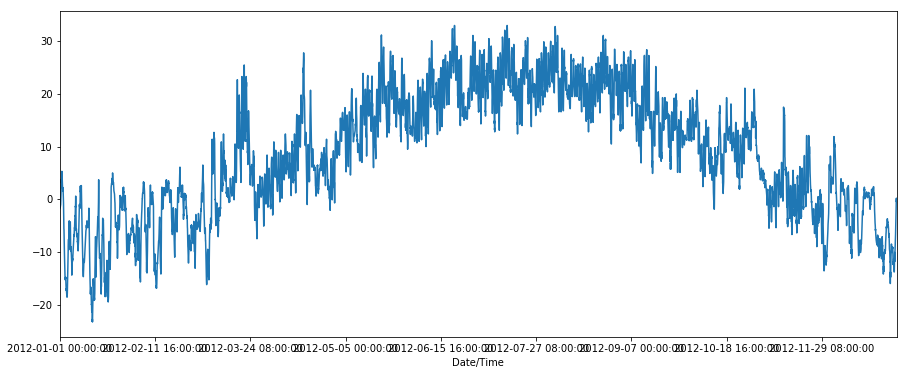

In [2]:
weather_2012_final = pd.read_csv('../data/weather_2012.csv', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

# 5.1 Downloading one month of weather data

When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for [Canadian historical weather data](http://climate.weather.gc.ca/index_e.html#access), and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

Here's an URL template you can use to get data in Montreal. 

In [3]:
url_template = "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5308&Year=1985&Month=1&Day=1&timeframe=2&submit=Download+Data"

In [4]:
url_template = "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

To get the data for March 2013, we need to format it with `month=3, year=2012`.

In [5]:
url = url_template.format(month=3, year=2012)
print(url)

https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year=2012&Month=3&timeframe=1&submit=Download+Data


In [6]:
url = url_template.format(month=3, year=2012)
weather_mar2012 = pd.read_csv(url, index_col='Date/Time', parse_dates=True)

This is super great! We can just use the same `read_csv` function as before, and just give it a URL as a filename. Awesome.

There are 16 rows of metadata at the top of this CSV, but pandas knows CSVs are weird, so there's a `skiprows` options. We parse the dates again, and set 'Date/Time' to be the index column. Here's the resulting dataframe.

In [7]:
weather_mar2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,NaN,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,NaN,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,NaN,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,NaN,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,NaN,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow
2012-03-01 05:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,05:00,-5.3,NaN,...,NaN,2.4,NaN,100.58,NaN,NaN,NaN,-14.0,NaN,Snow
2012-03-01 06:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,06:00,-5.2,NaN,...,NaN,4.0,NaN,100.57,NaN,NaN,NaN,-14.0,NaN,Snow
2012-03-01 07:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,07:00,-4.9,NaN,...,NaN,1.6,NaN,100.59,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 08:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,08:00,-5.0,NaN,...,NaN,1.2,NaN,100.59,NaN,NaN,NaN,-13.0,NaN,Snow


Let's plot it!

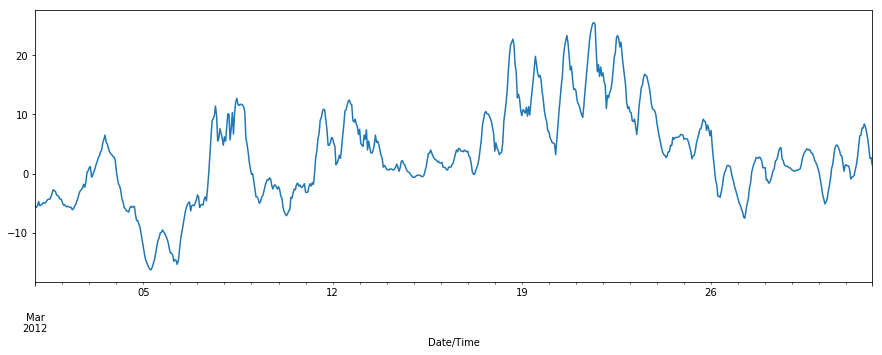

In [8]:
weather_mar2012["Temp (°C)"].plot(figsize=(15, 5))

You'll notice in the summary above that there are a few columns which are are either entirely empty or only have a few values in them. Let's get rid of all of those with `dropna`.

The argument `axis=1` to `dropna` means "drop columns", not rows", and `how='any'` means "drop the column if any value is null". 

This is much better now -- we only have columns with real data.

In [9]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,-7.8,83,35,1.6,100.62,Snow


The Year/Month/Day/Time columns are redundant, though, and the Data Quality column doesn't look too useful. Let's get rid of those.

The `axis=1` argument means "Drop columns", like before. The default for operations like `dropna` and `drop` is always to operate on rows.

In [10]:
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time'], axis=1)
weather_mar2012[:5]

,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.4,-7.8,83,35,1.6,100.62,Snow


Awesome! We now only have the relevant columns, and it's much more manageable.